In [85]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


pd.options.display.max_columns = None

In [86]:
df = pd.read_csv('Clean Datasets/All-Clean-Game-Logs.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points Against,W,L,Home Game,Win Streak,Lose Streak,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP FG%,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF,FG_rolling_5,FGA_rolling_5,FG%_rolling_5,3P_rolling_5,3PA_rolling_5,3P%_rolling_5,FT_rolling_5,FTA_rolling_5,FT%_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP FG_rolling_5,OPP FGA_rolling_5,OPP FG%_rolling_5,OPP 3P_rolling_5,OPP 3PA_rolling_5,OPP 3P%_rolling_5,OPP FT_rolling_5,OPP FTA_rolling_5,OPP FT%_rolling_5,OPP ORB_rolling_5,OPP TRB_rolling_5,OPP AST_rolling_5,OPP STL_rolling_5,OPP BLK_rolling_5,OPP TOV_rolling_5,OPP PF_rolling_5,Rest_Days_Binned
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,W,78,70,1,0,True,0,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,W,83,71,2,0,False,1,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,3-4
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,L,69,90,2,1,False,2,0,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,1-2
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,W,66,53,3,1,True,0,1,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,8+
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,W,85,57,4,1,True,1,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,1-2


In [87]:
# Rename columns with spaces for better usability

df = df.rename(columns={
    "Home Game": "Home_Game",
    "Points For": "Points_For",
    "Points Against": "Points_Against",
    "Rest Days": "Rest_Days",
    "Ranked Match": "Ranked_Match",
    "Win Streak": "Win_Streak",
    "Lose Streak": "Lose_Streak",
    "FG%": "FG_Percent",
    "3P%": "3P_Percent",
    "FT%": "FT_Percent",
    "OPP FG": "OPP_FG",
    "OPP FGA": "OPP_FGA",
    "OPP FG%": "OPP_FG_Percent",
    "OPP 3P": "OPP_3P",
    "OPP 3PA": "OPP_3PA",
    "OPP 3P%": "OPP_3P_Percent",
    "OPP FT": "OPP_FT",
    "OPP FTA": "OPP_FTA",
    "OPP FT%": "OPP_FT_Percent",
    "OPP ORB": "OPP_ORB",
    "OPP TRB": "OPP_TRB",
    'OPP AST': 'OPP_AST',
    'OPP STL': 'OPP_STL',
    'OPP BLK': 'OPP_BLK',
    'OPP TOV': 'OPP_TOV',
    'OPP PF': 'OPP_PF',
    'FG_rolling_5': 'FG_rolling_5',
    'FGA_rolling_5': 'FGA_rolling_5',
    'FG%_rolling_5': 'FG_Percent_rolling_5',
    '3P_rolling_5': '3P_rolling_5',
    '3PA_rolling_5': '3PA_rolling_5',
    '3P%_rolling_5': '3P_Percent_rolling_5',
    'FT_rolling_5': 'FT_rolling_5',
    'FTA_rolling_5': 'FTA_rolling_5',
    'FT%_rolling_5': 'FT_Percent_rolling_5',
    'ORB_rolling_5': 'ORB_rolling_5',
    'TRB_rolling_5': 'TRB_rolling_5',
    'AST_rolling_5': 'AST_rolling_5',
    'STL_rolling_5': 'STL_rolling_5',
    'BLK_rolling_5': 'BLK_rolling_5',
    'TOV_rolling_5': 'TOV_rolling_5',
    'PF_rolling_5': 'PF_rolling_5',
    'OPP FG_rolling_5': 'OPP_FG_rolling_5',
    'OPP FGA_rolling_5': 'OPP_FGA_rolling_5',
    'OPP FG%_rolling_5': 'OPP_FG_Percent_rolling_5',
    'OPP 3P_rolling_5': 'OPP_3P_rolling_5',
    'OPP 3PA_rolling_5': 'OPP_3PA_rolling_5',
    'OPP 3P%_rolling_5': 'OPP_3P_Percent_rolling_5',
    'OPP FT_rolling_5': 'OPP_FT_rolling_5',
    'OPP FTA_rolling_5': 'OPP_FTA_rolling_5',
    'OPP FT%_rolling_5': 'OPP_FT_Percent_rolling_5',
    'OPP ORB_rolling_5': 'OPP_ORB_rolling_5',
    'OPP TRB_rolling_5': 'OPP_TRB_rolling_5',
    'OPP AST_rolling_5': 'OPP_AST_rolling_5',
    'OPP STL_rolling_5': 'OPP_STL_rolling_5',
    'OPP BLK_rolling_5': 'OPP_BLK_rolling_5',
    'OPP TOV_rolling_5': 'OPP_TOV_rolling_5',
    'OPP PF_rolling_5': 'OPP_PF_rolling_5'
})

In [88]:
# Turn our response variable to categorical

df['Result'] = 1 * (df['Result'] == 'W')
df['BIG_10'] = 1 * (df['Conf'] == 'Big Ten')
df

,Date,Time,Season,Type,Opponent,Rank,Ranked_Match,Conf,Rest_Days,SRS,Result,Points_For,Points_Against,W,L,Home_Game,Win_Streak,Lose_Streak,FG,FGA,FG_Percent,3P,3PA,3P_Percent,FT,FTA,FT_Percent,ORB,TRB,AST,STL,BLK,TOV,PF,OPP_FG,OPP_FGA,OPP_FG_Percent,OPP_3P,OPP_3PA,OPP_3P_Percent,OPP_FT,OPP_FTA,OPP_FT_Percent,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF,FG_rolling_5,FGA_rolling_5,FG_Percent_rolling_5,3P_rolling_5,3PA_rolling_5,3P_Percent_rolling_5,FT_rolling_5,FTA_rolling_5,FT_Percent_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP_FG_rolling_5,OPP_FGA_rolling_5,OPP_FG_Percent_rolling_5,OPP_3P_rolling_5,OPP_3PA_rolling_5,OPP_3P_Percent_rolling_5,OPP_FT_rolling_5,OPP_FTA_rolling_5,OPP_FT_Percent_rolling_5,OPP_ORB_rolling_5,OPP_TRB_rolling_5,OPP_AST_rolling_5,OPP_STL_rolling_5,OPP_BLK_rolling_5,OPP_TOV_rolling_5,OPP_PF_rolling_5,Rest_Days_Binned,BIG_10
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,1,78,70,1,0,True,0,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,1,83,71,2,0,False,1,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,3-4,0
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,0,69,90,2,1,False,2,0,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,1-2,0
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,1,66,53,3,1,True,0,1,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,8+,0
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,1,85,57,4,1,True,1,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,1-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2024-01-18,8:30p,2023-2024,REG,Michigan,NaN,False,Big Ten,0,5.28,1,88,73,13,4,False,1,0,30,62,0.484,6,18,0.333,22,30,0.733,13,38,12,9,4,6,13,30,63,0.476,3,13,0.231,10,12,0.833,7,25,10,1,0,9,18,25.0,61.400000,0.4084,6.200000,20.2,0.309000,20.00,26.000000,0.77360,10.60,35.400000,10.200000,6.2,4.000000,7.000000,77.400000,29.800000,65.000000,0.459200,3.8

In [89]:
# creat train and test dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=22, stratify=df['Result'])
print(len(df))
print(len(df_train))
print(len(df_test))

166
132
34


In [90]:
# Create a basic model predicting Result from the 5 highest correlated variables
model_1 = smf.logit('Result ~ OPP_FG_Percent + FG_Percent + OPP_FT + SRS + TRB', data=df_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.340705
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  132
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.4387
Time:                        23:11:17   Log-Likelihood:                -44.973
converged:                       True   LL-Null:                       -80.119
Covariance Type:            nonrobust   LLR p-value:                 8.909e-14
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4634      3.545      0.131      0.896      -6.485       7.412
OPP_FG_Percent   

In [91]:
# Predict on training data

train_predictions_1 = model_1.predict(df_train[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'SRS', 'TRB']])
train_accuracy_1 = (train_predictions_1.round() == df_train['Result']).mean()

# Predict on test data

test_predictions_1 = model_1.predict(df_test[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'SRS', 'TRB']])
test_accuracy_1 = (test_predictions_1.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_1)
print("Test Accuracy:", test_accuracy_1)

Training Accuracy: 0.8787878787878788
Test Accuracy: 0.9411764705882353


In [92]:
# Now create a model that would be more realistic with what kind of data we would have before a match

model_2 = smf.logit('Result ~ Win_Streak + Lose_Streak + SRS + Rank + Ranked_Match + Home_Game + FG_Percent_rolling_5 + OPP_FG_Percent_rolling_5', data=df_train).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.626613
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                   37
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            7
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                 0.09551
Time:                        23:11:18   Log-Likelihood:                -23.185
converged:                       True   LL-Null:                       -25.633
Covariance Type:            nonrobust   LLR p-value:                    0.6726
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.8792   1.15e+14  -4.25e-14      1.000   -2.25e+14

In [93]:
# Predict on training data
train_predictions_2 = model_2.predict(df_train[['Win_Streak', 'Lose_Streak', 'SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
train_accuracy_2 = (train_predictions_2.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_2 = model_2.predict(df_test[['Win_Streak', 'Lose_Streak', 'SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
test_accuracy_2 = (test_predictions_2.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_2)
print("Test Accuracy:", test_accuracy_2)

Training Accuracy: 0.1893939393939394
Test Accuracy: 0.20588235294117646


In [94]:
from sklearn.ensemble import RandomForestClassifier

df_clean = df.dropna()
# non_numeric = []
# for col in df_clean:
#     if df_clean[col].dtypes != "float64":
#         non_numeric.append(col) #gets rid of non numeric attributes (doesn't work with randomforest?)

# X = df_clean.drop(columns= non_numeric) #the features/predictors of our model that don't have nan values
# Y = df_clean['Result'] #goal/ what we're trying to predict with random forest regressor 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak', 'Lose_Streak']
target = 'Result'

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)


random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
y_prediction = random_forest.predict(X_test)
y_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
test_data = pd.DataFrame(X_test)
test_data['actual'] = y_test
test_data['prediction'] = y_prediction
test_data.head()

,Ranked_Match,Rank,BIG_10,Rest_Days,SRS,Home_Game,Win_Streak,Lose_Streak,actual,prediction
155,True,1.0,1,0,24.93,False,7,0,0,1
146,True,3.0,1,8,24.93,True,1,0,0,0
22,True,9.0,1,5,17.82,True,0,1,0,1
84,True,3.0,1,3,19.15,False,4,0,0,0
121,True,24.0,1,2,14.58,True,1,0,1,0


In [97]:
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.4


In [98]:
class_report = classification_report(y_test, y_prediction)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.33      0.20      0.25         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



In [99]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train length: {len(y_train)}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test length: {len(y_test)}")

X_train shape: (36, 8)
Y_train length: 36
X_test shape: (10, 8)
Y_test length: 10


In [100]:
print(X_train.describe())  # Summary statistics
print(X_train.dtypes)      # Check data types


            Rank     BIG_10  Rest_Days        SRS  Win_Streak  Lose_Streak
count  36.000000  36.000000  36.000000  36.000000   36.000000    36.000000
mean   11.805556   0.638889   3.694444  18.024167    2.416667     0.444444
std     6.877788   0.487136   1.704103   3.747007    2.309917     0.876501
min     1.000000   0.000000   0.000000  13.040000    0.000000     0.000000
25%     5.000000   0.000000   3.000000  14.477500    0.000000     0.000000
50%    11.000000   1.000000   4.000000  18.240000    2.000000     0.000000
75%    18.250000   1.000000   4.000000  21.400000    4.000000     1.000000
max    24.000000   1.000000  10.000000  26.700000    8.000000     4.000000
Ranked_Match       bool
Rank            float64
BIG_10            int64
Rest_Days         int64
SRS             float64
Home_Game          bool
Win_Streak        int64
Lose_Streak       int64
dtype: object


In [101]:
import lightgbm as lgb

params = {'objective' : 'binary', 
          'boosting_type' : 'gbdt',           
          'num_leaves' : 5, 
          'force_row_wise' : True, 
          'metric' : 'rmse', 
          'learning_rate' : 0.5, 
          'feature_fraction' : 0.8, 
          'bagging_fraction' : 0.8,
          'min_data_in_bin' : 1,
          'min_data_in_leaf' : 1,
          'max_bin' : 256
          } 

#https://lightgbm.readthedocs.io/en/latest/Parameters.html <- explanation for parameters
#https://www.geeksforgeeks.org/train-a-model-using-lightgbm/ <- same here

training_data = lgb.Dataset(X_train, label = y_train)
testing_data = lgb.Dataset(X_test, label = y_test, reference = training_data)

gbm = lgb.train(params, training_data,
                 num_boost_round = 41, 
                 valid_sets = testing_data)

#looking into lightgbm modeling, documentation (https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api)

[LightGBM] [Info] Number of positive: 17, number of negative: 19
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 36, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472222 -> initscore=-0.111226
[LightGBM] [Info] Start training from score -0.111226


In [102]:
y_pred_proba = gbm.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) #converts to binary predictions 
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [103]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define features and target
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak', 'Lose_Streak']
target = 'Result'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)


In [106]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=22, ...)

In [107]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.7647058823529411

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.90      0.75      0.82        24

    accuracy                           0.76        34
   macro avg       0.74      0.78      0.74        34
weighted avg       0.80      0.76      0.77        34

Test AUC-ROC Score: 0.7833333333333333


<Figure size 1000x600 with 0 Axes>

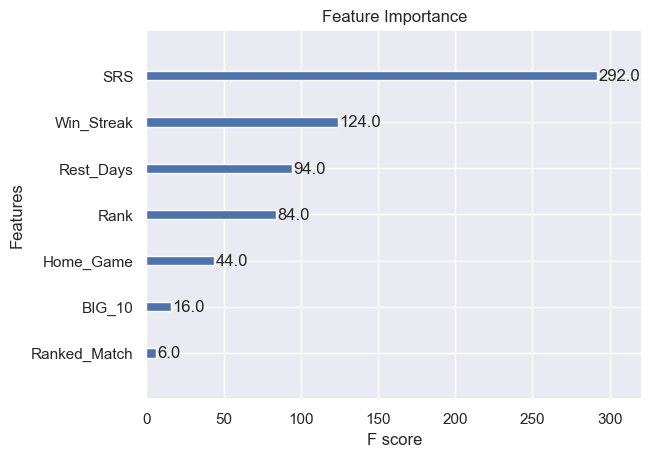

In [108]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

In [109]:
# SRS is our most important by far, let's see how it would do on it's own

# Define feature and target
feature = 'SRS'
target = 'Result'

X = df[feature]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 0.9090909090909091
Test Accuracy: 0.7352941176470589

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.86      0.75      0.80        24

    accuracy                           0.74        34
   macro avg       0.70      0.72      0.70        34
weighted avg       0.76      0.74      0.74        34

Test AUC-ROC Score: 0.79375


In [110]:
# Strong, but still not as good as our first model
# We can try removing Lose_Streak and Ranked_Match from our new model

# Define feature and target
features = ['Rank','Rest_Days', 'SRS', 'Home_Game', 'Win_Streak']
target = 'Result'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.7058823529411765

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.89      0.67      0.76        24

    accuracy                           0.71        34
   macro avg       0.69      0.73      0.69        34
weighted avg       0.77      0.71      0.72        34

Test AUC-ROC Score: 0.775


<Figure size 1000x600 with 0 Axes>

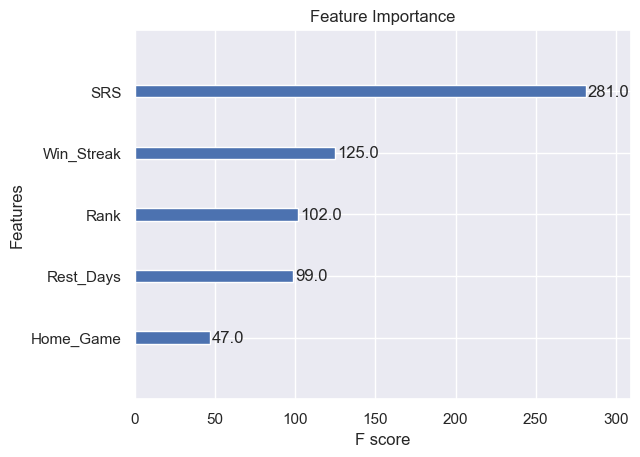

In [111]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Perform hyperparameter tuning

# Define our parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,
    n_jobs=-1  # Use all available processors
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print best parameters and roc score
print("Best Parameters:", random_search.best_params_)
print("Best AUC-ROC Score:", random_search.best_score_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Make predictions
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate performance
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test AUC-ROC Score:", roc_auc_score(y_test, y_test_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best AUC-ROC Score: 0.749655388471178
Test Accuracy: 0.7941176470588235
Test AUC-ROC Score: 0.7958333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.90      0.79      0.84        24

    accuracy                           0.79        34
   macro avg       0.76      0.80      0.77        34
weighted avg       0.82      0.79      0.80        34



In [113]:
# Refine our parameter grid
refined_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.2],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=refined_grid,
    n_iter=50,  # Number of combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,
    n_jobs=-1  # Use all available processors
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print best parameters and roc score
print("Best Parameters:", random_search.best_params_)
print("Best AUC-ROC Score:", random_search.best_score_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Make predictions
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test AUC-ROC Score:", roc_auc_score(y_test, y_test_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best AUC-ROC Score: 0.7427005012531328
Test Accuracy: 0.7941176470588235
Test AUC-ROC Score: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.95      0.75      0.84        24

    accuracy                           0.79        34
   macro avg       0.77      0.82      0.78        34
weighted avg       0.85      0.79      0.80        34



In [114]:
# Now create our best model so far so we can perfrom crossvalidation
# Define the model with the best hyperparameters
xgb_best = XGBClassifier(
    subsample=0.9,
    n_estimators=300,
    min_child_weight=3,
    max_depth=7,
    learning_rate=0.2,
    gamma=0.1,
    colsample_bytree=0.6,
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_best.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 0.9545454545454546
Test Accuracy: 0.7941176470588235

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.95      0.75      0.84        24

    accuracy                           0.79        34
   macro avg       0.77      0.82      0.78        34
weighted avg       0.85      0.79      0.80        34

Test AUC-ROC Score: 0.875


In [115]:
# Observe generalization
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=5, scoring="roc_auc")
print("Fold AUC-ROC Scores:", cv_scores)
print("Mean AUC-ROC:", cv_scores.mean())
print("Standard Deviation of AUC-ROC:", cv_scores.std())

Fold AUC-ROC Scores: [0.81578947 0.75       0.7518797  0.63888889 0.75694444]
Mean AUC-ROC: 0.7427005012531328
Standard Deviation of AUC-ROC: 0.0573746965623678


### Apply Models to 2024-2025 Season

In [239]:
from bs4 import BeautifulSoup
import requests

In [240]:
url = 'https://www.sports-reference.com/cbb/schools/illinois/men/2025-schedule.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

sched_table = soup.find('table', id='schedule')

sched_elements = sched_table.find_all('th', scope='col')
sched_titles = [th.get_text(strip=True) for th in sched_elements]
df_sched = pd.DataFrame(columns=sched_titles)

sched_body = sched_table.find('tbody')
sched_rows = sched_body.find_all('tr')
for row in sched_rows:
    if 'thead' in row.get('class', []):
        continue

    header = row.find_all('th')
    data = row.find_all('td')

    whole_row = [th.get_text(strip = True) for th in header]
    whole_row.extend([td.get_text(strip = True) for td in data])
    print(whole_row)
        
    df_sched.loc[len(df_sched)] = whole_row

['1', 'Mon, Nov 4, 2024', '8:00p', 'REG', '', 'Eastern Illinois', 'OVC', '-11.86', 'W', '112', '67', '', '1', '0', 'W 1', 'State Farm Center']
['2', 'Fri, Nov 8, 2024', '8:00p', 'REG', '', 'Southern Illinois-Edwardsville', 'OVC', '-5.05', 'W', '90', '58', '', '2', '0', 'W 2', 'State Farm Center']
['3', 'Wed, Nov 13, 2024', '9:00p', 'REG', '', 'Oakland', 'Horizon', '-8.49', 'W', '66', '54', '', '3', '0', 'W 3', 'State Farm Center']
['4', 'Wed, Nov 20, 2024', '9:00p', 'REG', 'N', 'Alabama(8)', 'SEC', '25.18', 'L', '87', '100', '', '3', '1', 'L 1', 'Legacy Arena']
['5', 'Sat, Nov 23, 2024', '4:00p', 'REG', '', 'Maryland-Eastern Shore', 'MEAC', '-26.24', 'W', '87', '40', '', '4', '1', 'W 1', 'State Farm Center']
['6', 'Mon, Nov 25, 2024', '9:00p', 'REG', '', 'Little Rock', 'OVC', '-6.97', 'W', '92', '34', '', '5', '1', 'W 2', 'State Farm Center']
['7', 'Thu, Nov 28, 2024', '4:00p', 'REG', 'N', 'Arkansas(19)', 'SEC', '18.03', 'W', '90', '77', '', '6', '1', 'W 3', 'Sprint Center']
['8', 'Fri

In [241]:
df_sched

,G,Date,Time,Type,,Opponent,Conf,SRS,,Tm,Opp,OT,W,L,Streak,Arena
0,1,"Mon, Nov 4, 2024",8:00p,REG,,Eastern Illinois,OVC,-11.86,W,112,67,,1,0,W 1,State Farm Center
1,2,"Fri, Nov 8, 2024",8:00p,REG,,Southern Illinois-Edwardsville,OVC,-5.05,W,90,58,,2,0,W 2,State Farm Center
2,3,"Wed, Nov 13, 2024",9:00p,REG,,Oakland,Horizon,-8.49,W,66,54,,3,0,W 3,State Farm Center
3,4,"Wed, Nov 20, 2024",9:00p,REG,N,Alabama(8),SEC,25.18,L,87,100,,3,1,L 1,Legacy Arena
4,5,"Sat, Nov 23, 2024",4:00p,REG,,Maryland-Eastern Shore,MEAC,-26.24,W,87,40,,4,1,W 1,State Farm Center
5,6,"Mon, Nov 25, 2024",9:00p,REG,,Little Rock,OVC,-6.97,W,92,34,,5,1,W 2,State Farm Center
6,7,"Thu, Nov 28, 2024",4:00p,REG,N,Arkansas(19),SEC,18.03,W,90,77,,6,1,W 3,Sprint Center
7,8,"Fri, Dec 6, 2024",,REG,@,Northwestern,Big Ten,11.63,,,,,,,,Welsh-Ryan Arena
8,9,"Tue, Dec 10, 2024",9:00p,REG,,Wisconsin(15),Big Ten,22.82,,,,,,,,State Farm Center
9,10,"Sat, Dec 14, 2024",5:30p,REG,,Tennessee(7),SEC,32.57,,,,,,,,State Farm Center


In [242]:
# Rename the columns
df_sched = df_sched.rename(columns={'': 'Site'}, inplace=False)
df_sched.columns.values[4] = 'Site'
df_sched.columns.values[8] = 'Result'

In [243]:
url2 = 'https://www.sports-reference.com/cbb/schools/illinois/men/2025-gamelogs.html'
page2 = requests.get(url2)
soup2 = BeautifulSoup(page2.text, 'html')

log_table = soup2.find('table', id='sgl-basic_NCAAM')

log_elements = log_table.find_all('th', scope='col')
log_titles = [th.get_text(strip=True) for th in log_elements]
df_log = pd.DataFrame(columns=log_titles)

log_body = log_table.find('tbody')
log_rows = log_body.find_all('tr')
for row in log_rows:
    if 'over_header thead' in row.get('class', []):
        continue
    elif 'thead' in row.get('class', []):
        continue

    header = row.find_all('th')
    data = row.find_all('td')

    whole_row = [th.get_text(strip=True) for th in header]
    whole_row.extend([td.get_text(strip=True) for td in data])
    print(whole_row)

    df_log.loc[len(df_log)] = whole_row

['1', '2024-11-04', '', 'Eastern Illinois', 'W', '112', '67', '31', '64', '.484', '16', '42', '.381', '34', '46', '.739', '14', '56', '16', '2', '9', '13', '21', '', '26', '68', '.382', '4', '12', '.333', '11', '25', '.440', '3', '24', '5', '5', '1', '7', '29']
['2', '2024-11-08', '', 'SIU-Edwardsville', 'W', '90', '58', '28', '63', '.444', '15', '38', '.395', '19', '28', '.679', '13', '43', '21', '2', '6', '5', '13', '', '22', '73', '.301', '6', '24', '.250', '8', '17', '.471', '14', '33', '11', '3', '3', '7', '23']
['3', '2024-11-13', '', 'Oakland', 'W', '66', '54', '23', '55', '.418', '7', '25', '.280', '13', '17', '.765', '10', '32', '11', '9', '2', '16', '11', '', '20', '53', '.377', '4', '25', '.160', '10', '11', '.909', '6', '24', '9', '10', '1', '15', '16']
['4', '2024-11-20', 'N', 'Alabama', 'L', '87', '100', '32', '71', '.451', '10', '30', '.333', '13', '24', '.542', '13', '42', '15', '7', '5', '12', '16', '', '39', '75', '.520', '11', '34', '.324', '11', '13', '.846', '5', '

In [244]:
df_log

,G,Date,,Opp,W/L,Tm,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,2024-11-04,,Eastern Illinois,W,112,67,31,64,.484,16,42,.381,34,46,.739,14,56,16,2,9,13,21,,26,68,.382,4,12,.333,11,25,.440,3,24,5,5,1,7,29
1,2,2024-11-08,,SIU-Edwardsville,W,90,58,28,63,.444,15,38,.395,19,28,.679,13,43,21,2,6,5,13,,22,73,.301,6,24,.250,8,17,.471,14,33,11,3,3,7,23
2,3,2024-11-13,,Oakland,W,66,54,23,55,.418,7,25,.280,13,17,.765,10,32,11,9,2,16,11,,20,53,.377,4,25,.160,10,11,.909,6,24,9,10,1,15,16
3,4,2024-11-20,N,Alabama,L,87,100,32,71,.451,10,30,.333,13,24,.542,13,42,15,7,5,12,16,,39,75,.520,11,34,.324,11,13,.846,5,35,23,7,6,7,17
4,5,2024-11-23,,Maryland-Eastern Shore,W,87,40,33,74,.446,10,40,.250,11,18,.611,19,56,9,8,9,9,11,,15,68,.221,5,20,.250,5,8,.625,10,32,3,6,1,15,16
5,6,2024-11-25,,Little Rock,W,92,34,30,68,.441,10,31,.323,22,26,.846,14,49,20,11,4,8,11,,13,55,.236,3,14,.214,5,12,.417,6,23,5,7,1,14,18
6,7,2024-11-28,N,Arkansas,W,90,77,30,57,.526,15,31,.484,15,22,.682,5,30,16,7,4,10,22,,28,58,.483,5,17,.294,16,27,.593,8,28,12,7,2,11,20
7,8,2024-12-06,@,Northwestern,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,9,2024-12-10,,Wisconsin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,10,2024-12-14,,Tennessee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [245]:
df_sched = df_sched.drop(columns=['G', 'Site', 'Streak', 'OT'])
df_sched['Home_Game'] = df_sched['Arena'] == 'State Farm Center'
df_sched = df_sched.drop(columns='Arena')
df_sched.rename(columns={'Unnamed: 9' : 'Result'}, inplace=True)
df_sched.insert(4, 'Rank', None)
df_sched['Rank'] = df_sched['Opponent'].str.extract(r'\((\d+)\)')
df_sched['Rank'] = df_sched['Rank'].apply(lambda x: int(x) if pd.notna(x) else None)
df_sched['Opponent'] = df_sched['Opponent'].str.replace(r'\s*\(\d+\)', '', regex=True)
df_sched.insert(5, 'Ranked_Match', None)
df_sched['Ranked_Match'] = df_sched['Rank'].notna()
df_sched

,Date,Time,Type,Opponent,Rank,Ranked_Match,Conf,SRS,Result,Tm,Opp,W,L,Home_Game
0,"Mon, Nov 4, 2024",8:00p,REG,Eastern Illinois,NaN,False,OVC,-11.86,W,112,67,1,0,True
1,"Fri, Nov 8, 2024",8:00p,REG,Southern Illinois-Edwardsville,NaN,False,OVC,-5.05,W,90,58,2,0,True
2,"Wed, Nov 13, 2024",9:00p,REG,Oakland,NaN,False,Horizon,-8.49,W,66,54,3,0,True
3,"Wed, Nov 20, 2024",9:00p,REG,Alabama,8.0,True,SEC,25.18,L,87,100,3,1,False
4,"Sat, Nov 23, 2024",4:00p,REG,Maryland-Eastern Shore,NaN,False,MEAC,-26.24,W,87,40,4,1,True
5,"Mon, Nov 25, 2024",9:00p,REG,Little Rock,NaN,False,OVC,-6.97,W,92,34,5,1,True
6,"Thu, Nov 28, 2024",4:00p,REG,Arkansas,19.0,True,SEC,18.03,W,90,77,6,1,False
7,"Fri, Dec 6, 2024",,REG,Northwestern,NaN,False,Big Ten,11.63,,,,,,False
8,"Tue, Dec 10, 2024",9:00p,REG,Wisconsin,15.0,True,Big Ten,22.82,,,,,,True
9,"Sat, Dec 14, 2024",5:30p,REG,Tennessee,7.0,True,SEC,32.57,,,,,,True


In [246]:
df_log = df_log.drop(columns=['G', ''])
df_log

,Date,Opp,W/L,Tm,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,2024-11-04,Eastern Illinois,W,112,67,31,64,.484,16,42,.381,34,46,.739,14,56,16,2,9,13,21,26,68,.382,4,12,.333,11,25,.440,3,24,5,5,1,7,29
1,2024-11-08,SIU-Edwardsville,W,90,58,28,63,.444,15,38,.395,19,28,.679,13,43,21,2,6,5,13,22,73,.301,6,24,.250,8,17,.471,14,33,11,3,3,7,23
2,2024-11-13,Oakland,W,66,54,23,55,.418,7,25,.280,13,17,.765,10,32,11,9,2,16,11,20,53,.377,4,25,.160,10,11,.909,6,24,9,10,1,15,16
3,2024-11-20,Alabama,L,87,100,32,71,.451,10,30,.333,13,24,.542,13,42,15,7,5,12,16,39,75,.520,11,34,.324,11,13,.846,5,35,23,7,6,7,17
4,2024-11-23,Maryland-Eastern Shore,W,87,40,33,74,.446,10,40,.250,11,18,.611,19,56,9,8,9,9,11,15,68,.221,5,20,.250,5,8,.625,10,32,3,6,1,15,16
5,2024-11-25,Little Rock,W,92,34,30,68,.441,10,31,.323,22,26,.846,14,49,20,11,4,8,11,13,55,.236,3,14,.214,5,12,.417,6,23,5,7,1,14,18
6,2024-11-28,Arkansas,W,90,77,30,57,.526,15,31,.484,15,22,.682,5,30,16,7,4,10,22,28,58,.483,5,17,.294,16,27,.593,8,28,12,7,2,11,20
7,2024-12-06,Northwestern,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,2024-12-10,Wisconsin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,2024-12-14,Tennessee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [247]:
df_predict = pd.merge(df_sched, df_log, left_index=True,right_index=True, how='inner')
def add_rest_time(game_log):
    game_log['Date_x'] = pd.to_datetime(game_log['Date_x'])
    game_log = game_log.sort_values(by='Date_x').reset_index(drop=True)
    game_log['Rest_Days'] = game_log['Date_x'].diff().dt.days.fillna(0).astype(int)
    game_log['Rest_Days'] = game_log['Rest_Days'].apply(lambda x: max(x, 0))
    game_log.insert(8, 'Rest_Days', game_log.pop('Rest_Days'))
    
    return game_log

df_predict = add_rest_time(df_predict)
df_predict['Win_Streak'] = 0
df_predict['Lose_Streak'] = 0
df_predict = df_predict[['Opponent', 'Rank', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak']]
df_predict

,Opponent,Rank,Rest_Days,SRS,Home_Game,Win_Streak
0,Eastern Illinois,NaN,0,-11.86,True,0
1,Southern Illinois-Edwardsville,NaN,4,-5.05,True,0
2,Oakland,NaN,5,-8.49,True,0
3,Alabama,8.0,7,25.18,False,0
4,Maryland-Eastern Shore,NaN,3,-26.24,True,0
5,Little Rock,NaN,2,-6.97,True,0
6,Arkansas,19.0,3,18.03,False,0
7,Northwestern,NaN,8,11.63,False,0
8,Wisconsin,15.0,4,22.82,True,0
9,Tennessee,7.0,4,32.57,True,0


In [248]:
# Dynamically update Win_Streak and Results
win_streak = 0
win_streaks = []
results = []

for i, row in df_predict.iterrows():
    current_streak = win_streak
    
    X_current = row[['Rank', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak']].values.reshape(1, -1)

    y_pred = xgb_best.predict(X_current)
    
    win_streaks.append(current_streak)

    if y_pred == 1:
        results.append("W")
        win_streak += 1
    else:
        results.append("L")
        win_streak = 0

df_predict['Win_Streak'] = win_streaks
df_predict['Result'] = results

df_predict

,Opponent,Rank,Rest_Days,SRS,Home_Game,Win_Streak,Result
0,Eastern Illinois,NaN,0,-11.86,True,0,W
1,Southern Illinois-Edwardsville,NaN,4,-5.05,True,1,W
2,Oakland,NaN,5,-8.49,True,2,W
3,Alabama,8.0,7,25.18,False,3,L
4,Maryland-Eastern Shore,NaN,3,-26.24,True,0,W
5,Little Rock,NaN,2,-6.97,True,1,W
6,Arkansas,19.0,3,18.03,False,2,L
7,Northwestern,NaN,8,11.63,False,0,L
8,Wisconsin,15.0,4,22.82,True,0,L
9,Tennessee,7.0,4,32.57,True,0,W


In [251]:
# Print season record
season_counts = df_predict['Result'].value_counts()

season_wins = season_counts.get('W', 0)  
season_losses = season_counts.get('L', 0) 

print(f"Season Record: {season_wins} Wins - {season_losses} Losses")

Season Record: 17 Wins - 14 Losses
